# **RNN Introduction**


## Importing required libraries


In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [3]:
df = pd.read_csv('/content/traffic (1).csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df.sample(5)

,DateTime,Junction,Vehicles,ID
15385,2015-12-04 01:00:00,2,9,20151204012
6435,2016-07-26 03:00:00,1,28,20160726031
6802,2016-08-10 10:00:00,1,50,20160810101
4912,2016-05-23 16:00:00,1,54,20160523161
32789,2016-03-30 05:00:00,3,4,20160330053


In [6]:
scaler = MinMaxScaler()
df['Vehicles'] = scaler.fit_transform(df['Vehicles'].values.reshape(-1, 1))

In [8]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length)])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(df['Vehicles'].values, seq_length)

## Visualization

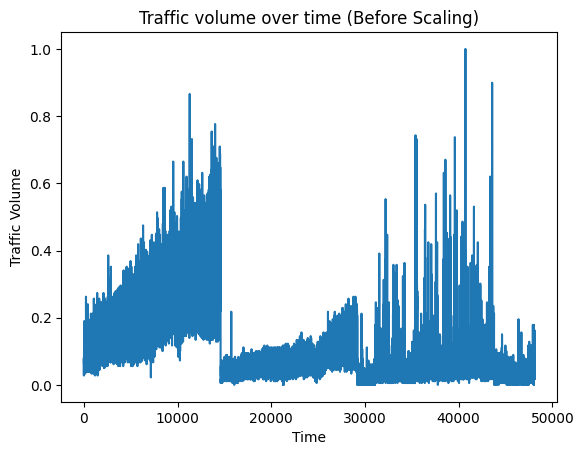

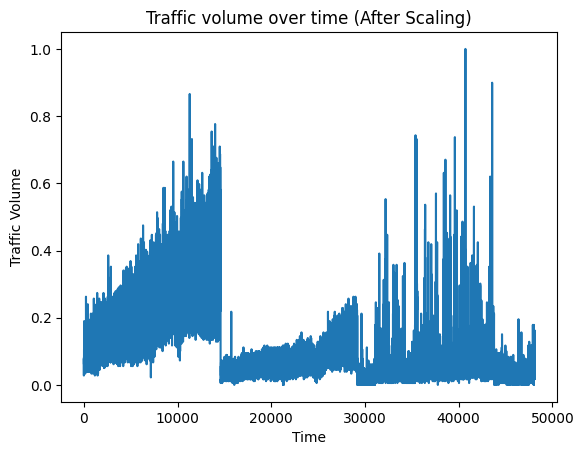

In [9]:
# Before scaling
plt.plot(df['Vehicles'])
plt.title("Traffic volume over time (Before Scaling)")
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.show()

# After scaling
plt.plot(df['Vehicles'])
plt.title("Traffic volume over time (After Scaling)")
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.show()

## Split the data into train and test

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Vehicles'].values.reshape(-1, 1))

train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

## Modeling


In [11]:
n_past = 60

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [12]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(38436, 60)
(38436,)


Testing set size:-
(9564, 60)
(9564,)


(None, None)

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:
model = Sequential()


model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))


model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=3,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])


Epoch 1/3
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 61s 51ms/step - loss: 0.0016 - val_loss: 8.4639e-04
Epoch 2/3
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - loss: 0.0012 - val_loss: 8.7117e-04
Epoch 3/3
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - loss: 0.0010 - val_loss: 8.5848e-04


In [18]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

1202/1202 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


## Visualization of results


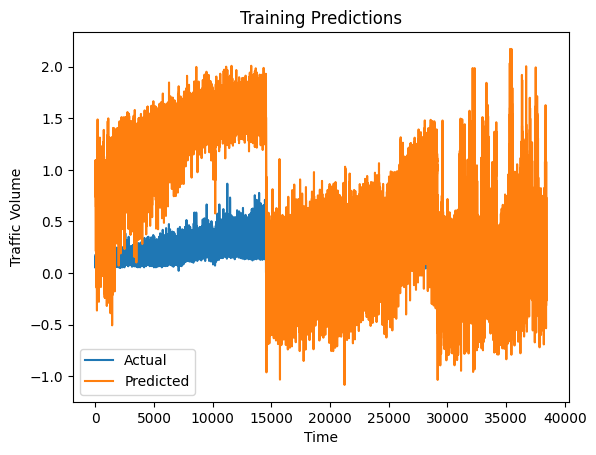

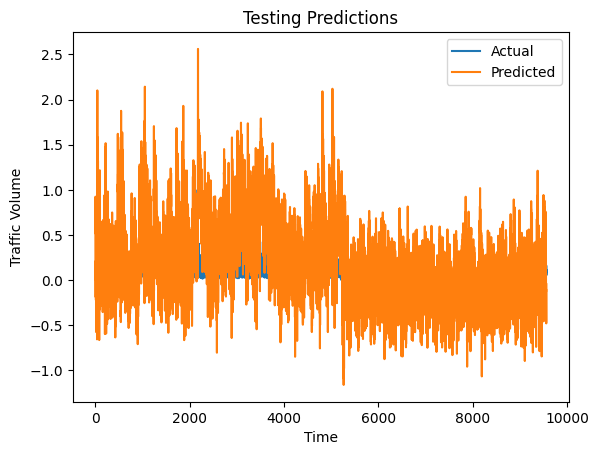

In [22]:
#train
plt.plot(y_train, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Training Predictions')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()
#test
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Testing Predictions')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()